In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from zipfile import ZipFile
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
# from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
## Extracting the contents of the train data from drive.
with ZipFile('/content/drive/MyDrive/train_pizza.zip') as zipObj:
  zipObj.extractall('/sample/train_pizza/')

In [ ]:
#Extracting the contents of test data from drive.
with ZipFile('/content/drive/MyDrive/test_pizza.zip') as zipObj1:
  zipObj1.extractall('/test_pizza')

In [ ]:
## Mark the paths.
training_dataset_path = "/sample/train_pizza/train_pizza"
test_dataset_path = "/test/test_pizza"

In [ ]:
#Setting up the parameters.
EPOCHS = 30
BATCH_SIZE = 32
image_height = 227
image_width = 227
train_dir = "/sample/train_pizza/train"
valid_dir = "/test/test_pizza"
# model_dir = "./my_model.h5"

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid_datagenerator = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagenerator.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 930 images belonging to 2 classes.
Found 371 images belonging to 2 classes.


In [ ]:
def plot_accuracy(hist):
        
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("Model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [ ]:
def plot_loss(hist):
  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

VGG 16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(input_shape= [224,224,3],weights='imagenet', include_top=False)




In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
F = Flatten()(model.output)
prediction = Dense(2, activation='softmax')(F)
model_VGG16 = Model(inputs=model.input, outputs=prediction)
model_VGG16.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_VGG16.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
# model2.fit(train_generator, epochs=5)
# model2.fit(...)

m=model_VGG16.fit(train_generator,validation_data  = valid_generator
,epochs=3,verbose=2)


Epoch 1/3
30/30 - 688s - loss: 0.7439 - accuracy: 0.7495 - val_loss: 0.7096 - val_accuracy: 0.7008 - 688s/epoch - 23s/step
Epoch 2/3
30/30 - 682s - loss: 0.3792 - accuracy: 0.8462 - val_loss: 0.5428 - val_accuracy: 0.7601 - 682s/epoch - 23s/step
Epoch 3/3
30/30 - 686s - loss: 0.3265 - accuracy: 0.8634 - val_loss: 0.6644 - val_accuracy: 0.7601 - 686s/epoch - 23s/step


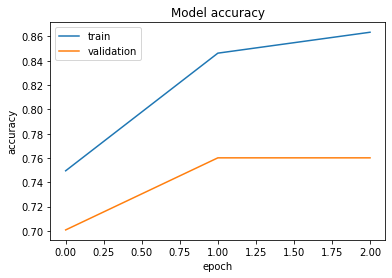

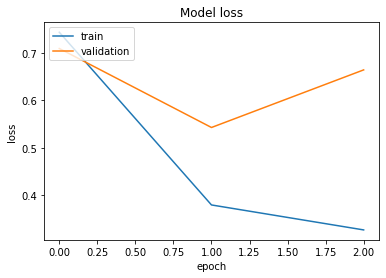

In [ ]:
plot_accuracy(m)
plot_loss(m)

VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

model1 = VGG19(input_shape= [224,224,3],weights='imagenet', include_top=False)

In [ ]:
for layer in model1.layers:
  layer.trainable=False

In [ ]:
Y = Flatten()(model1.output)
prediction = Dense(2, activation='softmax')(Y)
model_VGG19 = Model(inputs=model1.input, outputs=prediction)
model_VGG19.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_VGG19.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
# model2.fit(train_generator, epochs=5)
# model2.fit(...)
trained_model_VGG19=model_VGG19.fit_generator(train_generator,validation_data  = valid_generator,epochs=5,verbose=2)

<ipython-input-68-0497c1db729d>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model_VGG19=model_VGG19.fit_generator(train_generator,validation_data  = valid_generator,epochs=5,verbose=2)


Epoch 1/5
30/30 - 867s - loss: 0.8209 - accuracy: 0.6699 - val_loss: 0.5293 - val_accuracy: 0.7709 - 867s/epoch - 29s/step
Epoch 2/5
30/30 - 856s - loss: 0.7154 - accuracy: 0.7323 - val_loss: 1.0124 - val_accuracy: 0.5606 - 856s/epoch - 29s/step
Epoch 3/5
30/30 - 856s - loss: 0.5894 - accuracy: 0.7753 - val_loss: 0.8274 - val_accuracy: 0.6226 - 856s/epoch - 29s/step
Epoch 4/5
30/30 - 856s - loss: 0.3874 - accuracy: 0.8387 - val_loss: 0.4426 - val_accuracy: 0.7736 - 856s/epoch - 29s/step
Epoch 5/5
30/30 - 856s - loss: 0.3187 - accuracy: 0.8570 - val_loss: 0.4757 - val_accuracy: 0.7925 - 856s/epoch - 29s/step


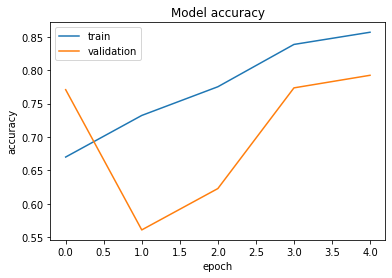

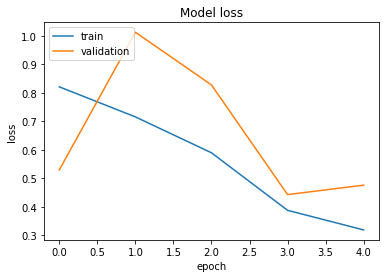

In [ ]:
plot_accuracy(trained_model_VGG19)
plot_loss(trained_model_VGG19)